In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data = pd.read_csv('INPUT_TS.csv')

Item 1

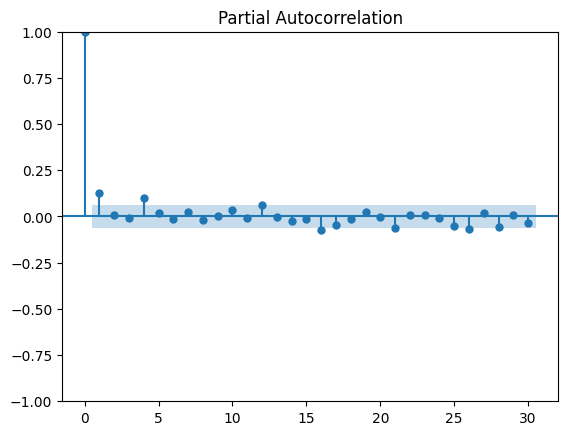

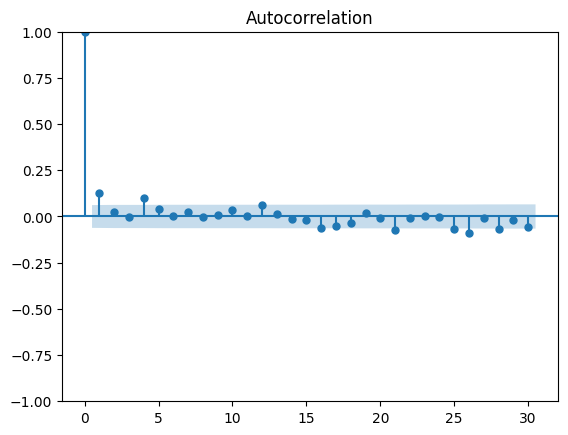

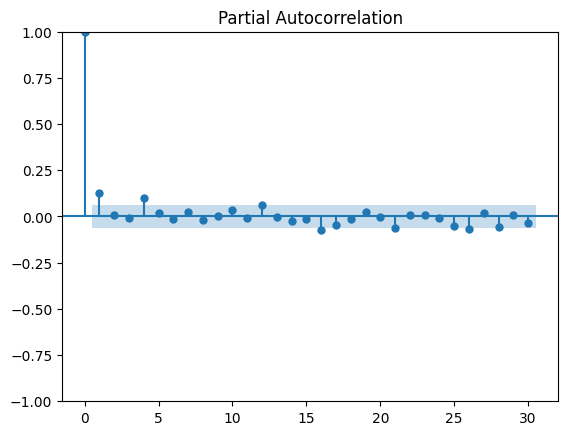

In [ ]:
diff_data = data['Price'].diff().dropna()


sm.graphics.tsa.plot_acf(diff_data, lags=30)
sm.graphics.tsa.plot_pacf(diff_data, lags=30)


Выбираем d=1, так как на графике ACF в этом лаге присутствует сильный скачок, значит выбранное значение является минимальным которое удаляет единичный корень.

Item 2

Алгоритм поиска:
1. Установим диапазон значений для p, q, r и s (например, от 1 до 3).
2. Переберем все возможные комбинации p, q, r и s в пределах диапазона, чтобы соответствовать различным моделям ARIMA-GARCH.
3. Рассчитаем информационный критерий Акаике (AIC) для каждой модели, который уравновешивает степень соответствия и сложность модели.
4. В качестве окончательной модели выберем модель с наименьшим AIC.

In [ ]:
d=1
p_values = [1, 2, 3]
q_values = [1, 2, 3]
r_values = [1, 2, 3]
s_values = [1, 2, 3]

aic_values = []

for p in p_values:
    for q in q_values:
        for r in r_values:
            for s in s_values:

                model = sm.tsa.arima.ARIMA(data['Price'], order=(p, d, q))
                model_fit = model.fit()
                model = arch_model(model_fit.resid, vol='Garch', p=r, q=s)
                results = model.fit(disp='off')

                aic = results.aic

                aic_values.append((p, q, r, s, aic))


min_aic = min(aic_values, key=lambda x: x[4])
p_best, q_best, r_best, s_best = min_aic[0], min_aic[1], min_aic[2], min_aic[3]

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Item 3

In [ ]:
model = sm.tsa.ARIMA(data['Price'], order=(p_best, d, q_best))
model = model.fit()
armodel = arch_model(model.resid, vol='Garch', p=r_best, q=s_best)
results = armodel.fit(disp='off')

print("Estimated Coefficients:")
print(results.params)

Estimated Coefficients:
mu         -1.458648e-02
omega       9.000947e-02
alpha[1]    1.819639e-01
beta[1]     5.233028e-01
beta[2]     6.471999e-18
beta[3]     2.609938e-01
Name: params, dtype: float64


Item 4

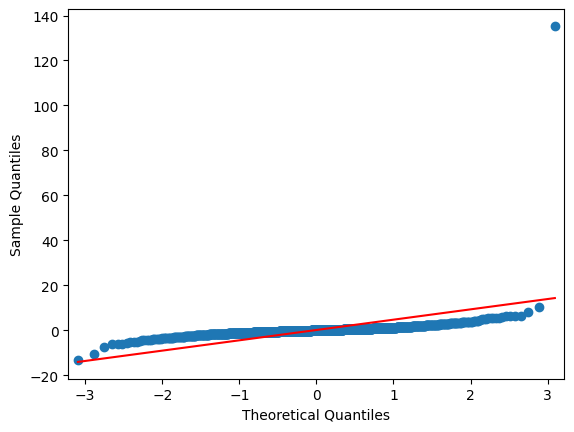

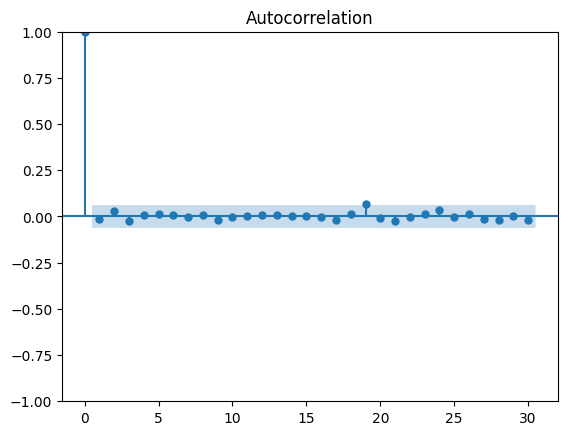

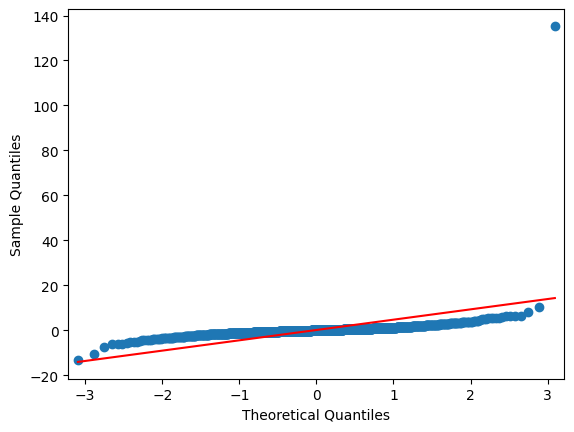

In [ ]:

sm.graphics.tsa.plot_acf(results.resid, lags=30)


sm.qqplot(results.resid, line='s')

Item 5

AttributeError: ignored

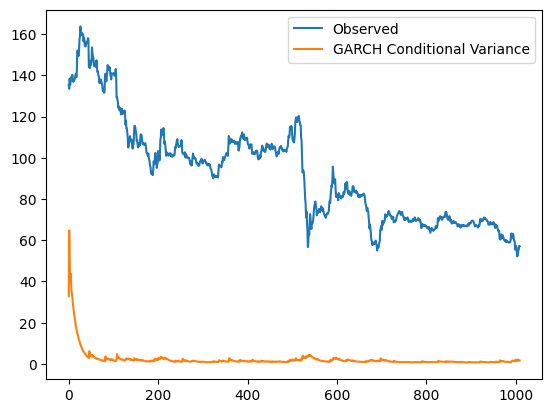

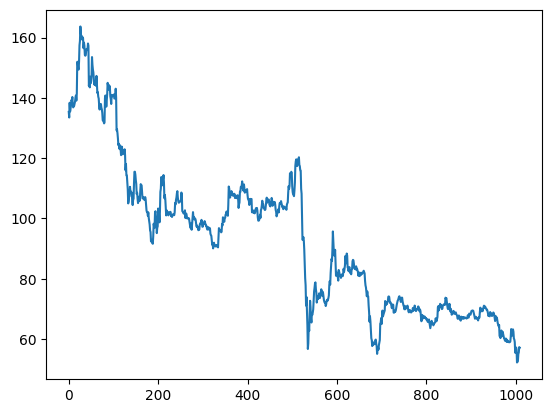

In [ ]:
fig, ax = plt.subplots()
ax.plot(data['Price'], label='Observed')
ax.plot(results.conditional_volatility, label='GARCH Conditional Variance')
ax.legend()



fig, ax = plt.subplots()
ax.plot(data['Price'], label='Observed')
ax.plot(model.conditional_mean, label='ARIMA Conditional Mean')
ax.legend()

